<a href="https://colab.research.google.com/github/mahidher/MNIST-using-2-layer-neural-network/blob/main/Neural_Networks_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt 


In [3]:
import torchvision

In [4]:
from torchvision.datasets import MNIST

In [5]:
from torchvision.transforms import ToTensor

In [6]:
dataset = MNIST(root='./sample_data',download=True,transform =ToTensor())

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./sample_data/MNIST/raw/train-images-idx3-ubyte.gz to ./sample_data/MNIST/raw




Extracting ./sample_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./sample_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./sample_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./sample_data/MNIST/raw




Extracting ./sample_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./sample_data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
len(dataset)

60000

In [8]:
test_dataset = MNIST(root='./sample_data',download=True,train=False,transform =ToTensor())

In [9]:
len(test_dataset)

10000

In [10]:
from torch.utils.data import random_split

In [11]:
train_ds,val_ds = random_split(dataset,[50000,10000])

In [12]:
len(train_ds)

50000

In [13]:
train_ds

In [14]:
image,label = train_ds[0]

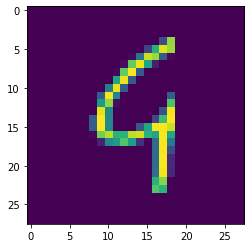

In [15]:
plt.imshow(image[0])

In [16]:
from torch.utils.data import DataLoader

In [17]:
train_loader = DataLoader(train_ds,batch_size=128,shuffle=True)
val_loader = DataLoader(val_ds,batch_size=128*2)

In [18]:
for images,labels in train_loader:
  inputs = images.reshape(-1,784)
  break

In [19]:
len(images)

128

In [20]:
input_size = inputs.shape[-1]
hidden_size = 32

In [21]:
input_size


784

In [22]:
from torch.nn import Linear

In [23]:
layer1 = Linear(input_size,hidden_size)

In [24]:
layer1.bias

Parameter containing:
tensor([-7.2528e-03, -2.1223e-02,  3.4247e-02,  2.1845e-02,  5.0285e-05,
         3.8192e-03, -1.8756e-02, -2.8981e-02,  3.4808e-02, -2.2176e-02,
        -3.1608e-02, -8.4400e-03, -1.5138e-02,  2.2638e-02,  1.8547e-03,
         7.1712e-04, -3.4941e-02,  3.7642e-03,  2.5317e-02, -1.7126e-02,
        -2.6717e-03,  2.8399e-02,  1.8385e-02, -2.2181e-02,  3.4154e-02,
        -1.3490e-03, -5.1767e-04, -2.2505e-02,  2.5659e-03, -2.9699e-02,
         3.1930e-02, -1.5736e-02], requires_grad=True)

In [25]:
layer1.weight.shape

torch.Size([32, 784])

In [26]:
inputs.shape

torch.Size([128, 784])

In [27]:
layer1_outputs = layer1(inputs)

In [28]:
print("layer1 output shape",layer1_outputs.shape)

layer1 output shape torch.Size([128, 32])


In [29]:
import torch.nn.functional as F

In [30]:
relu_outputs = F.relu(layer1_outputs)

In [31]:
relu_outputs.shape

torch.Size([128, 32])

In [32]:
output_size = 10

In [33]:
layer2 = Linear(hidden_size,output_size)

In [34]:
layer2_outputs = layer2(relu_outputs)

In [35]:
layer2_outputs.shape

torch.Size([128, 10])

In [36]:
inputs.shape

torch.Size([128, 784])

In [37]:
import torch.nn as nn

In [38]:
class MnistModel(nn.Module):
    """Feedfoward neural network with 1 hidden layer"""
    def __init__(self, in_size, hidden_size, out_size):
        print("in_init")
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size, out_size)
        
    def forward(self, xb):
        # print("forwards")
        # Flatten the image tensors
        xb = xb.view(xb.size(0), -1)
        # Get intermediate outputs using hidden layer
        out = self.linear1(xb)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        return out
    
    def training_step(self, batch):
        # print("training_Step")
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        # print("validation_step")
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        # print("val epoch end")
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [39]:
input_size = 784
hidden_size = 32 # you can change this
num_classes = 10

In [40]:
model = MnistModel(input_size, hidden_size=32, out_size=num_classes)

in_init


In [41]:
for t in model.parameters():
  print(t[0])

tensor([-8.9538e-03,  2.2794e-02, -8.5300e-03, -2.5697e-02,  7.5634e-03,
         3.9012e-03, -2.4447e-02, -2.4071e-02,  1.2694e-02, -9.9467e-03,
        -8.9899e-03, -1.2552e-02, -3.3104e-02,  2.5793e-02, -1.6266e-02,
         3.4281e-03,  1.0278e-02, -1.0824e-02, -8.3361e-03,  3.1108e-02,
        -3.0096e-02, -5.0620e-03, -1.1145e-02,  1.7216e-02,  3.2137e-02,
         2.9419e-02,  9.6889e-03,  2.7011e-02, -2.6976e-02,  3.1240e-02,
        -3.2158e-02,  1.9872e-02,  1.3552e-02,  5.5817e-04, -9.1431e-03,
         2.4802e-03,  1.3884e-02, -2.0045e-02, -2.1351e-02, -1.5902e-03,
        -2.8589e-02, -1.5665e-02,  2.4587e-02, -9.6023e-03, -1.1735e-02,
         2.6545e-03, -1.8171e-03,  2.2635e-02,  3.1970e-02,  2.6338e-02,
         2.9838e-03,  9.8647e-04,  1.4415e-02,  2.3394e-02, -4.7243e-03,
        -1.1137e-02, -7.2476e-03, -2.3224e-03,  1.9382e-02, -1.1277e-02,
         1.2584e-02,  3.5225e-03,  2.0855e-02, -1.0143e-02, -2.5700e-02,
         2.4958e-03,  2.8664e-02, -2.8173e-02, -2.2

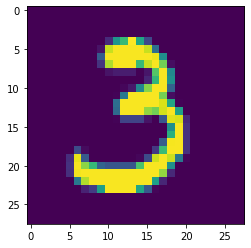

In [42]:
for images,labels in train_loader:
  plt.imshow(images[0][0])
  break

In [43]:
for images, labels in train_loader:
    # print(images)
    
    outputs = model(images)
    
    loss = F.cross_entropy(outputs, labels)
    print('Loss:', loss.item())
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

Loss: 2.3279457092285156
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.1395,  0.0035, -0.1336, -0.0005, -0.1469,  0.1937,  0.2368,  0.1527,
          0.0997,  0.1366],
        [ 0.0957,  0.1266, -0.1980, -0.0740, -0.2896,  0.1523,  0.1401,  0.0496,
         -0.0226,  0.2293]])


In [44]:
torch.cuda.is_available()
    

False

In [45]:
model.parameters

<bound method Module.parameters of MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)>

Training


In [46]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [47]:
def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    # print("in evaluate")
    outputs = [model.validation_step(batch) for batch in val_loader]
    # print(outputs[0])
    return model.validation_epoch_end(outputs)

In [48]:
def fit(epochs,lr,model,train_loader,val_loader,opt_func = torch.optim.SGD):
  print("in fit")
  history = []
  optimizer = opt_func(model.parameters(),lr)
  for epoch in range(epochs):
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    for i in model.parameters():
        print(i)
        break 
    result =evaluate(model,val_loader)
    model.epoch_end(epoch,result)
    history.append(result)
  return history

In [49]:
history = [evaluate(model, val_loader)]
history

[{'val_acc': 0.08339843899011612, 'val_loss': 2.315669059753418}]

In [50]:
history

[{'val_acc': 0.08339843899011612, 'val_loss': 2.315669059753418}]

In [51]:
history

[{'val_acc': 0.08339843899011612, 'val_loss': 2.315669059753418}]

In [52]:
history += fit(5, 0.5, model, train_loader, val_loader)

in fit
Parameter containing:
tensor([[-0.0090,  0.0228, -0.0085,  ...,  0.0320, -0.0089, -0.0260],
        [ 0.0050,  0.0135, -0.0144,  ...,  0.0272,  0.0143,  0.0273],
        [-0.0012,  0.0028, -0.0268,  ...,  0.0318,  0.0169,  0.0248],
        ...,
        [ 0.0099, -0.0208, -0.0008,  ..., -0.0032,  0.0354,  0.0165],
        [ 0.0051,  0.0085, -0.0336,  ...,  0.0339,  0.0292,  0.0085],
        [-0.0252, -0.0151,  0.0066,  ..., -0.0059, -0.0037,  0.0162]],
       requires_grad=True)
Epoch [0], val_loss: 0.2328, val_acc: 0.9309
Parameter containing:
tensor([[-0.0090,  0.0228, -0.0085,  ...,  0.0320, -0.0089, -0.0260],
        [ 0.0050,  0.0135, -0.0144,  ...,  0.0272,  0.0143,  0.0273],
        [-0.0012,  0.0028, -0.0268,  ...,  0.0318,  0.0169,  0.0248],
        ...,
        [ 0.0099, -0.0208, -0.0008,  ..., -0.0032,  0.0354,  0.0165],
        [ 0.0051,  0.0085, -0.0336,  ...,  0.0339,  0.0292,  0.0085],
        [-0.0252, -0.0151,  0.0066,  ..., -0.0059, -0.0037,  0.0162]],
       re

In [53]:
history += fit(5, 0.1, model, train_loader, val_loader)

in fit
Parameter containing:
tensor([[-0.0090,  0.0228, -0.0085,  ...,  0.0320, -0.0089, -0.0260],
        [ 0.0050,  0.0135, -0.0144,  ...,  0.0272,  0.0143,  0.0273],
        [-0.0012,  0.0028, -0.0268,  ...,  0.0318,  0.0169,  0.0248],
        ...,
        [ 0.0099, -0.0208, -0.0008,  ..., -0.0032,  0.0354,  0.0165],
        [ 0.0051,  0.0085, -0.0336,  ...,  0.0339,  0.0292,  0.0085],
        [-0.0252, -0.0151,  0.0066,  ..., -0.0059, -0.0037,  0.0162]],
       requires_grad=True)
Epoch [0], val_loss: 0.1171, val_acc: 0.9646
Parameter containing:
tensor([[-0.0090,  0.0228, -0.0085,  ...,  0.0320, -0.0089, -0.0260],
        [ 0.0050,  0.0135, -0.0144,  ...,  0.0272,  0.0143,  0.0273],
        [-0.0012,  0.0028, -0.0268,  ...,  0.0318,  0.0169,  0.0248],
        ...,
        [ 0.0099, -0.0208, -0.0008,  ..., -0.0032,  0.0354,  0.0165],
        [ 0.0051,  0.0085, -0.0336,  ...,  0.0339,  0.0292,  0.0085],
        [-0.0252, -0.0151,  0.0066,  ..., -0.0059, -0.0037,  0.0162]],
       re

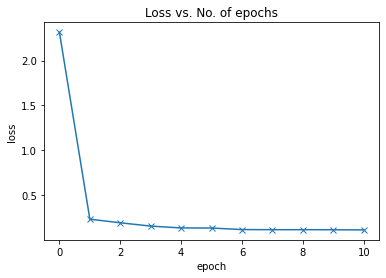

In [54]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

In [55]:
layer2_outputs.shape

torch.Size([128, 10])

In [56]:
layer2_outputs

tensor([[ 0.0561, -0.1253, -0.0353,  ..., -0.0586, -0.1716,  0.0871],
        [ 0.1212, -0.1390,  0.0779,  ...,  0.0240, -0.1086,  0.0452],
        [ 0.1306, -0.1438, -0.0596,  ..., -0.1093, -0.2022,  0.1660],
        ...,
        [ 0.1343, -0.2087, -0.0548,  ..., -0.1137, -0.1585,  0.1616],
        [ 0.1847, -0.1364, -0.1593,  ..., -0.1448, -0.1888,  0.2122],
        [ 0.0779, -0.1504, -0.0440,  ..., -0.0226, -0.2347,  0.1717]],
       grad_fn=<AddmmBackward>)

In [57]:
labels.shape

torch.Size([128])

In [58]:
labels

tensor([3, 8, 4, 3, 0, 3, 2, 0, 3, 3, 0, 0, 7, 7, 3, 2, 9, 3, 9, 4, 4, 9, 1, 1,
        0, 4, 6, 9, 5, 3, 3, 5, 8, 8, 0, 3, 3, 8, 4, 4, 0, 9, 7, 4, 2, 6, 2, 8,
        9, 9, 1, 4, 8, 5, 4, 4, 0, 1, 3, 9, 0, 6, 0, 3, 1, 6, 2, 4, 5, 4, 0, 9,
        1, 6, 5, 3, 5, 8, 4, 6, 1, 4, 4, 6, 9, 0, 9, 4, 0, 3, 9, 1, 9, 7, 9, 8,
        8, 6, 9, 1, 8, 1, 4, 4, 1, 0, 9, 7, 4, 4, 9, 7, 4, 3, 5, 7, 5, 8, 8, 6,
        2, 8, 5, 7, 8, 7, 5, 9])

In [59]:
loss = torch.nn.functional.cross_entropy
input = torch.randn(3, 5, requires_grad=True)
target = torch.randint(5, (3,), dtype=torch.int64)


In [60]:
input.shape

torch.Size([3, 5])

In [61]:
target.shape

torch.Size([3])

In [62]:
target

tensor([0, 4, 1])

In [63]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./sample_data
    Split: Test
    StandardTransform
Transform: ToTensor()

Now lets test on sample data

In [64]:
test_image,test_label = test_dataset[0]

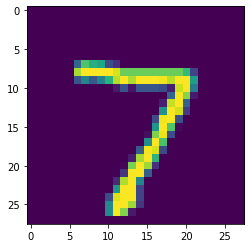

In [66]:
plt.imshow(test_image[0])

In [67]:
model(test_image)

tensor([[  0.1590,  -2.5854,   6.0912,   4.9459, -10.5364,  -0.2451,  -8.9289,
          14.8965,   0.1299,   0.9113]], grad_fn=<AddmmBackward>)

In [72]:
_,preds = torch.max(model(test_image),dim=1)

In [76]:
preds[0].item()

7

In [75]:
test_label

7